<a href="https://colab.research.google.com/github/Pooja-Arumugam/Prediction-of-diseases/blob/main/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive

/content/drive


In [4]:
cd MyDrive/

/content/drive/MyDrive


In [5]:
cd project


/content/drive/MyDrive/project


In [6]:
cd balanced_images

/content/drive/MyDrive/project/balanced_images


In [7]:
file_path = 'train'

In [8]:
name_class = os.listdir(file_path)
name_class

['COVID19', 'PNEUMONIA', 'NORMAL']

In [9]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [10]:
filepaths

['train/COVID19/COVID19(0).jpg',
 'train/COVID19/COVID19(102).jpg',
 'train/COVID19/COVID19(10).jpg',
 'train/COVID19/COVID19(103).jpg',
 'train/COVID19/COVID19(101).jpg',
 'train/COVID19/COVID19(104).jpg',
 'train/COVID19/COVID19(100).jpg',
 'train/COVID19/COVID19(106).jpg',
 'train/COVID19/COVID19(1).jpg',
 'train/COVID19/COVID19(105).jpg',
 'train/COVID19/COVID19(142).jpg',
 'train/COVID19/COVID19(143).jpg',
 'train/COVID19/COVID19(118).jpg',
 'train/COVID19/COVID19(126).jpg',
 'train/COVID19/COVID19(12).jpg',
 'train/COVID19/COVID19(108).jpg',
 'train/COVID19/COVID19(127).jpg',
 'train/COVID19/COVID19(121).jpg',
 'train/COVID19/COVID19(136).jpg',
 'train/COVID19/COVID19(114).jpg',
 'train/COVID19/COVID19(133).jpg',
 'train/COVID19/COVID19(11).jpg',
 'train/COVID19/COVID19(119).jpg',
 'train/COVID19/COVID19(141).jpg',
 'train/COVID19/COVID19(138).jpg',
 'train/COVID19/COVID19(129).jpg',
 'train/COVID19/COVID19(132).jpg',
 'train/COVID19/COVID19(125).jpg',
 'train/COVID19/COVID19(123

In [11]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'CO

In [12]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,train/PNEUMONIA/PNEUMONIA(1456).jpg,PNEUMONIA
1,train/PNEUMONIA/PNEUMONIA(877).jpg,PNEUMONIA
2,train/NORMAL/NORMAL(661).jpg,NORMAL
3,train/PNEUMONIA/PNEUMONIA(3035).jpg,PNEUMONIA
4,train/PNEUMONIA/PNEUMONIA(1747).jpg,PNEUMONIA


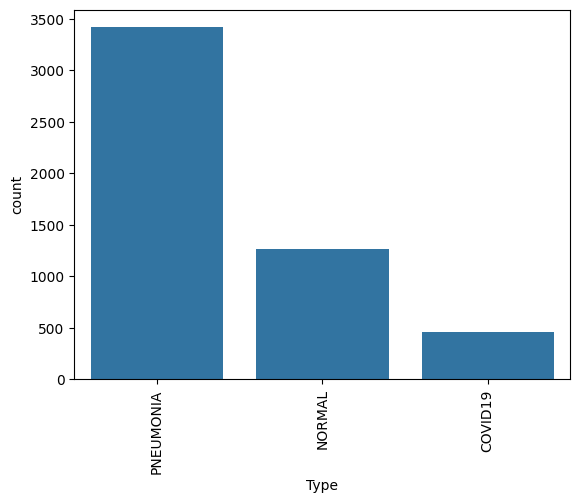

In [13]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [14]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

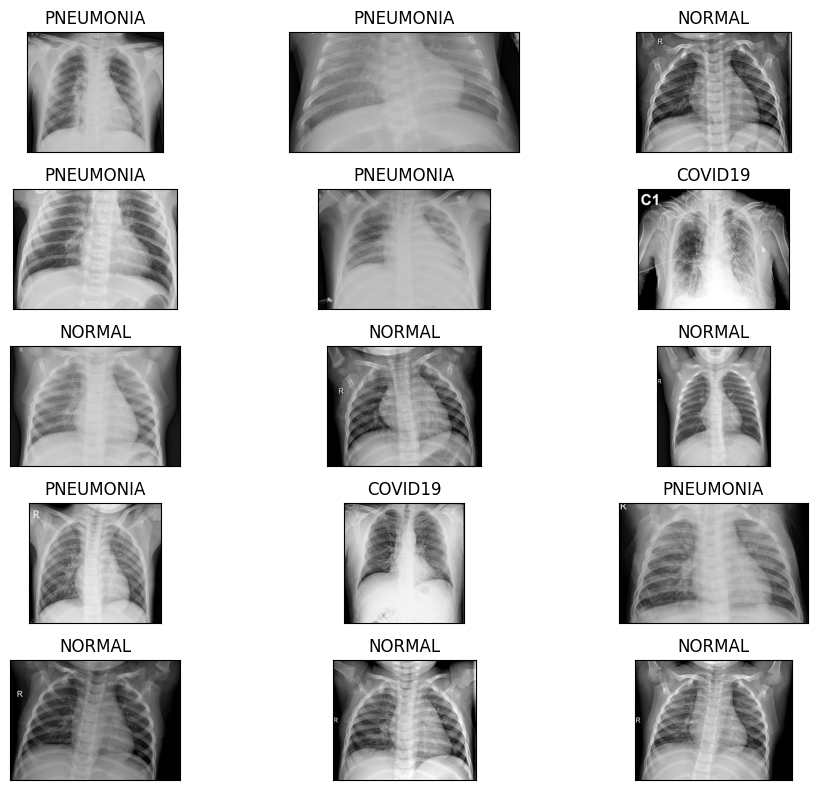

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [16]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [17]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 3858 validated image filenames belonging to 3 classes.
Found 1286 validated image filenames belonging to 3 classes.
Found 1286 validated image filenames belonging to 3 classes.


In [18]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [19]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


121/121 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.8374 - loss: 0.4297 - val_accuracy: 0.9215 - val_loss: 0.2022
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.9380 - loss: 0.1681 - val_accuracy: 0.9495 - val_loss: 0.1399
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.9560 - loss: 0.1261 - val_accuracy: 0.9331 - val_loss: 0.1774
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9609 - loss: 0.1083 - val_accuracy: 0.9479 - val_loss: 0.1304
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.9697 - loss: 0.0784 - val_accuracy: 0.9510 - val_loss: 0.1393
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - accuracy: 0.9723 - loss: 0.0794 - val_accuracy: 0.9557 - val_loss: 0.1291
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.9818 - loss: 0.0624 - val_accuracy: 0.9572 - val_loss: 0.1378
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.9845 - loss: 0.0442 - val_accuracy: 0.934

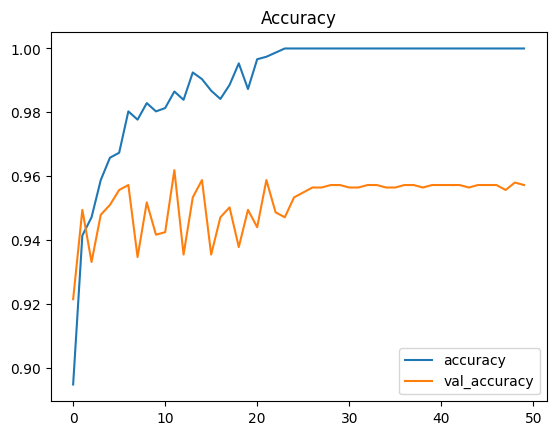

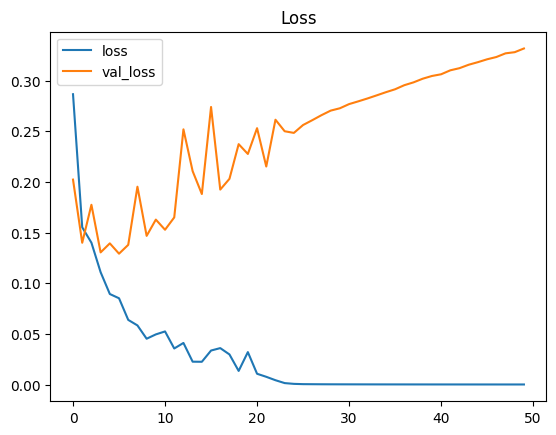

In [31]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [32]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.33164
Test Accuracy: 95.72%


In [33]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

41/41 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step


In [34]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     COVID19       0.98      0.96      0.97       114
      NORMAL       0.92      0.92      0.92       295
   PNEUMONIA       0.97      0.97      0.97       877

    accuracy                           0.96      1286
   macro avg       0.96      0.95      0.95      1286
weighted avg       0.96      0.96      0.96      1286



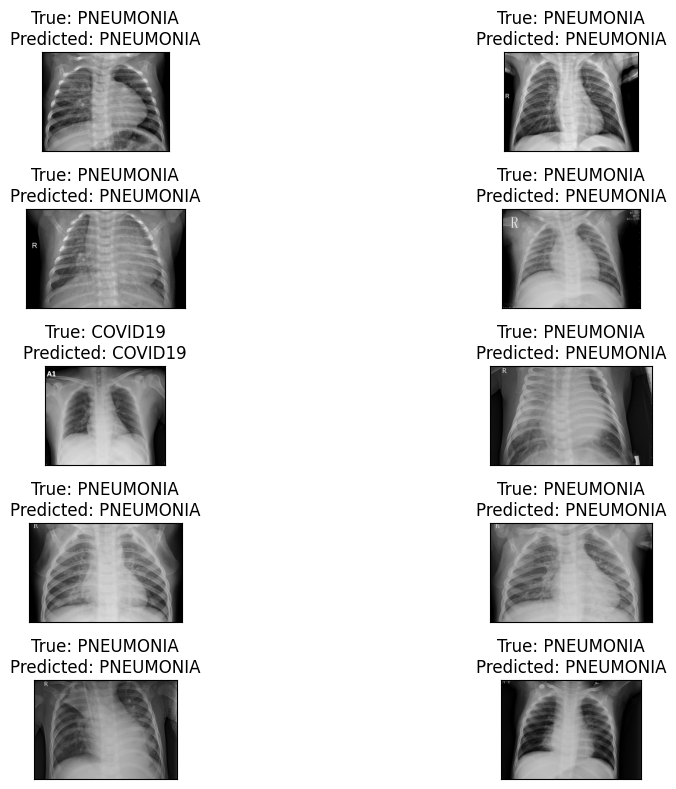

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
[[2.7213934e-12 1.0000000e+00 2.7555098e-09]]
[[  0 100   0]]


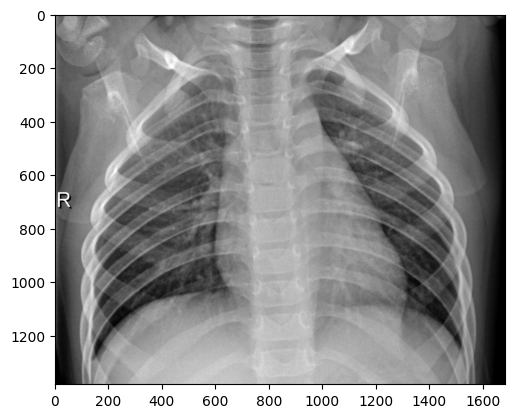

In [38]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '/content/drive/MyDrive/project/balanced_images/train/NORMAL/NORMAL(1005).jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print(result)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)


In [40]:
''' import cv2
import os

img_path='/content/drive/MyDrive/project/balanced_images/train/NORMAL/NORMAL(1005).jpg'
# Check if file exists
if not os.path.exists(img_path):
    print("File not found! Check the path:", img_path)
else:
    # Read and resize the image
    img = cv2.imread(img_path)
    if img is None:
        print("Image could not be loaded. Ensure it's a supported format.")
    else:
        img = cv2.resize(img, (224, 224))
        print("Image loaded and resized successfully!") '''


' import cv2\nimport os\n\nimg_path=\'/content/drive/MyDrive/project/balanced_images/train/NORMAL/NORMAL(1005).jpg\'\n# Check if file exists\nif not os.path.exists(img_path):\n    print("File not found! Check the path:", img_path)\nelse:\n    # Read and resize the image\n    img = cv2.imread(img_path)\n    if img is None:\n        print("Image could not be loaded. Ensure it\'s a supported format.")\n    else:\n        img = cv2.resize(img, (224, 224))\n        print("Image loaded and resized successfully!") '

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Predicted Disease: NORMAL


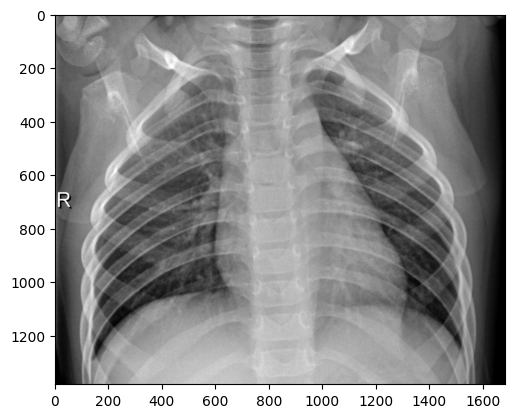

In [43]:
import cv2
import numpy as np
from matplotlib.pyplot import imread, imshow
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Path to the input image
img_path = '/content/drive/MyDrive/project/balanced_images/train/NORMAL/NORMAL(1005).jpg'

# Load the image using OpenCV and resize it to match the model input size
img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

# Preprocess the image
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

# Predict the class of the image
result = model.predict(x)

# Get the predicted class index
predicted_class_index = np.argmax(result, axis=1)[0]

# Map the index to the class label
labels = train_gen.class_indices  # Get the class indices from the training generator
labels = dict((v, k) for k, v in labels.items())  # Reverse the mapping to index -> label
predicted_label = labels[predicted_class_index]

# Print the predicted disease name
print(f"Predicted Disease: {predicted_label}")

# Display the input image
my_image = imread(img_path)
imshow(my_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Predicted Disease: PNEUMONIA


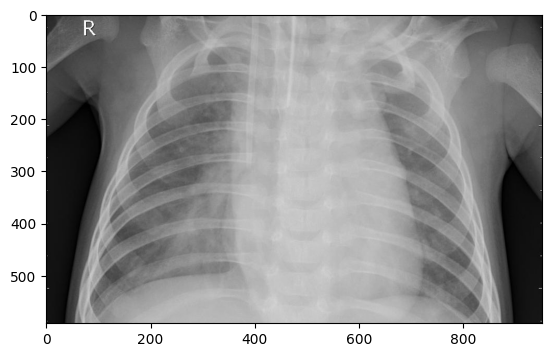

In [44]:


# Path to the input image
img_path = '/content/drive/MyDrive/project/balanced_images/test/PNEUMONIA/PNEUMONIA(3450).jpg'

# Load the image using OpenCV and resize it to match the model input size
img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

# Preprocess the image
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

# Predict the class of the image
result = model.predict(x)

# Get the predicted class index
predicted_class_index = np.argmax(result, axis=1)[0]

# Map the index to the class label
labels = train_gen.class_indices  # Get the class indices from the training generator
labels = dict((v, k) for k, v in labels.items())  # Reverse the mapping to index -> label
predicted_label = labels[predicted_class_index]

# Print the predicted disease name
print(f"Predicted Disease: {predicted_label}")

# Display the input image
my_image = imread(img_path)
imshow(my_image)
